Intro....

### Home Credit Default Risk 

## Data

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

In [3]:
## Make a SCHEMA

RESEARCH

ROC Curves and Area Under the Curve (AUC) Explained
https://www.youtube.com/watch?v=OAl6eAyP-yo

In [4]:
# Imports
# Standard data science stack: numpy, pandas, sklearn, matplotlib.
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
### import os

# Suppress warnings 
### import warnings
### warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Training data
app_train = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/application_test.csv')
bureau_bal = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/bureau_balance.csv')
bureau = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/bureau.csv')
CC_balance = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/credit_card_balance.csv')
Install_pay = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/installments_payments.csv')
Pos_Cash = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/POS_CASH_balance.csv')
Pre_app = pd.read_csv ('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/previous_application.csv')
Sample_sub = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/sample_submission.csv')

Home_Credit = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/HomeCredit_columns_description.csv')

Let's begin our EDA...

In [6]:
## Glimpse the data

print("app_train -  rows:",app_train.shape[0]," columns:", app_train.shape[1])
print("app_test -  rows:",app_test.shape[0]," columns:", app_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_bal -  rows:",bureau_bal.shape[0]," columns:", bureau_bal.shape[1])
print("CC_balance -  rows:",CC_balance.shape[0]," columns:", CC_balance.shape[1])
print("Install_pay -  rows:",Install_pay.shape[0]," columns:", Install_pay.shape[1])
print("Pre_app -  rows:",Pre_app.shape[0]," columns:", Pre_app.shape[1])
print("Pos_Cash -  rows:",Pos_Cash.shape[0]," columns:", Pos_Cash.shape[1])

app_train -  rows: 307511  columns: 122
app_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_bal -  rows: 1048575  columns: 3
CC_balance -  rows: 3840312  columns: 23
Install_pay -  rows: 13605401  columns: 8
Pre_app -  rows: 1670214  columns: 37
Pos_Cash -  rows: 10001358  columns: 8


In [7]:
#Only data-set in USE... till further UPDATE...
app_train.shape

(307511, 122)

In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [11]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

Examine the Distribution of the Target Column
The target is what we are asked to predict:

either a 0 for the loan was repaid on time,

or a 1 indicating the client had payment difficulties.

We can first examine the number of loans falling into each category.

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

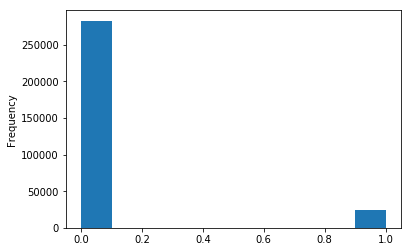

In [13]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an imbalanced class problem. 

There are far more loans that were repaid on time than loans that were not repaid. 

Once we get into more sophisticated machine learning models, 
we can weight the classes by their representation in the data to reflect this imbalance.

#### Examine Missing Values

Next we can look at the number and percentage of missing values in each column.

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Column Types
Let's look at the number of columns of each data type. 

int64 and float64 are numeric variables (which can be either discrete or continuous). ==> use this in TABLEAU

object columns contain strings and are categorical features. .

In [17]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [19]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. 

We will need to find a way to deal with these categorical variables...???

RESEARCH:
    
    Label Encoding VS One-Hot encoding
    Recheck if these are the best links 
    
    https://www.youtube.com/watch?v=9yl6-HEY7_s
    

#### Dimensionality_reduction

After we decide on the ENCODING.... 
"Label Encoding VS One-hot encoding"


the data will be much better suited for MACHINE LEARNING...???Research more??

but, altough it seems "better" it may also nees a Dimensionality_reduction

https://en.wikipedia.org/wiki/Dimensionality_reduction

#### Anomalies
One problem we always want to be on the lookout for when doing EDA is anomalies within the data. 

These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. 

One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. 

##### anomaly EXAMPLE
An anomaly EXAMPLE can be seen here in the DAYS_BIRTH column
which are negative numbers because they are recorded relative to the current loan application. 

To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [20]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

##### OBS: 
    Those ages look reasonable. 
    There are no outliers for the age on either the high or low end. 

### NOTES: #aggregate
   Python | Pandas dataframe.aggregate()
Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Dataframe.aggregate() function is used to apply some aggregation across one or more column. Aggregate using callable, string, dict, or list of string/callables. Most frequently used aggregations are:

sum: Return the sum of the values for the requested axis
min: Return the minimum of the values for the requested axis
max: Return the maximum of the values for the requested axis
    SOURCE+Info: https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/

##### groupby: 

group a dataframe by a column. In this case we will group by the unique client, the SK_ID_CURR column

##### agg:    (aggregate)

perform a calculation on the grouped data such as taking the mean of columns. We can either call the function directly (grouped_df.mean()) or use the agg function together with a list of transforms (grouped_df.agg([mean, max, min, sum]))

##### merge: 

match the aggregated statistics to the appropriate client. We need to merge the original training data with the calculated stats on the SK_ID_CURR column which will insert NaN in any cell for which the client does not have the corresponding statistic

##### rename

We also use the (rename) function quite a bit specifying the columns to be renamed as a dictionary. This is useful in order to keep track of the new variables we create.

####### NOW 

Write a function to automize this process and "do it for us" 

But, let's begin by implementing this by hand first...

##### Next Steps

Automize it...

### 001 -
Let's begin by choosing variables & creating our own "NEW VARIABLES" via aggregate functions...

Each of these VARIABLES will then be TESTED out in our: "Mutiple Regression Model"...

## Read in Data 

### There are a total of 10 files: 

1 main file for training (with target) ==> (application_train.csv)

1 main file for testing (without the target), ==> (application_test.csv)

1 example submission file ==> (sample_submission.csv)


### 6 other files containing additional information about each loan:

bureau_balance.csv

bureau.csv

credit_card_balance.csv

installments_payments.csv

POS_CASH_balance.csv

previous_application.csv


## PLUS + 
##### important:
(HomeCredit_columns_description.csv)

It contains the description of all the columns with extra info:

A ==> id

B ==> Table ==>(refers to each of the above 9 Data-Sets (csv files)

C ==> Row

D ==> Description

E ==> Specal ==> (for example if:

'normalized', 

"time only relative to the application", 

"rounded"

"hashed"

"recoded"

????? ===========> What does these ALL signify???


    
    

# List files available
###print(os.listdir("../input/"))

Let's identify and properly DEFINE any dubious acronyms in the DATA... 

### DEFINITIONS: 


	1.	AMTINCOMETOTAL is a monthly amount
	2.	AMT_ANNUITY is a monthly amount as mentioned in the other thread. Note that the income is self-proclaimed and there may be errors in the amount, therefore the payment-to-income ratio (annuity over income) may be incorrect in some cases
	3.	Term of the loan is not provided in the sample. However, you can approximate it
	4.	All loans are fixed rate. The annuity stays the same, however it may change in some special cases, like early repayment or installment schedule change

##### MONTHSBALANCE 
is relative to the application date of the current application (SKID_CURR)

##### SKIDCURR 
is ID of the current loan and 

##### SKIDPREV 
is ID of the previous loans and no current loan can be in the previous loans. 

##### AMTRECIVABLE - 
Amount receivable on the previous credit - i.e. total amount receivable 

##### AMTRECEIVABLE_PRINCIPAL - 
Amount receivable for principal on the previous credit, i,e. a part of receivable that is attributable to principal

##### bureaubalance.csv - MONTHSBALANCE - 
Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly)

##### POSCASHbalance.csv - MONTHS_BALANCE - 
(I renamed these...??? gotta check in the ("HomeCredit_columns_description.csv")
Month of balance relative to application date (-1 means the freshest balance date)




Dataset 
##### POSCASHBAL 
contains monthly snapshots of previous loans
	•	MONTHSBALANCE - denotes the number of months relative to the current application (i.e. the loan is being repaid with increasing MONTHSBALANCE, in other words MONTH_BALANCE is becoming less negative)
	•	CNT_INSTALMENT - denotes the total number of installments (term of the loan). This number may decrease if the client early repays the loan or increase in case of payment difficulties and change of the installment schedule
	•	CNTINSTALMENTFUTURE - denotes the number of installments to be paid
	•	NAMECONTRACTSTATUS - changes when the contract moves to another status (e.g. typically from active to completed when the loan is repaid)


 ##### EMP 
 stands for employer, therefore:
	•	FLAGEMPPHONE - employer phone
	•	FLAGWORKPHONE - work phone
	•	FLAG_PHONE - home phone

#####  'XAP' and 'XNA'  and “HC” are nan values. 
(https://www.kaggle.com/c/home-credit-default-risk/discussion/58209)

#####  'XAP' and 'XNA' 
==> (https://www.kaggle.com/c/home-credit-default-risk/discussion/57248)
or (https://www.kaggle.com/c/home-credit-default-risk/discussion/59274)




My 2 cents: I'll read it as:
#####  XNA = not available

##### XAP = not applicable (X as a logical not !?) i.e. a consumer loan has no cashloanpurpose.

Backing it with data from browsing the previous applications table.
NAMECONTRACTTYPE NAMECASHLOAN_PURPOSE
0 Consumer loans XAP
1 Cash loans XNA


 Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values. (https://www.kaggle.com/c/home-credit-default-risk/discussion/57247)

#### ALL discusions are 
HERE ==> https://www.kaggle.com/c/home-credit-default-risk/discussion

Now... lets try to understand the AGE RANGE of our applicants....

Let's proceed by using a "Label Encoder" (instead of "One-Hot encoding")

In [23]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


So we'll be adding "dummy varaibles" to these DATA-sets...

Let's focus on our "TARGET" which are the "Accepted" & "Denied" loan applicants...

In [24]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [25]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [26]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

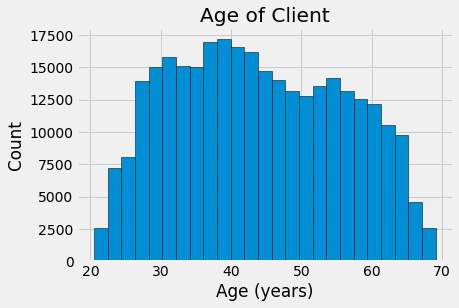

In [29]:
# Set the style of plots
plt.style.use('fivethirtyeight')
## fivethirtyeight is the Nate Silver website more info on how to do their graphs here

## LEARN MORE
## https://www.dataquest.io/blog/making-538-plots/

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

to get better insights from this graph we'll need to 
https://en.wikipedia.org/wiki/Kernel_density_estimation
    
    By itself, the distribution of age does not tell us much other than that 
    there are no outliers as all the ages are reasonable. 

In [30]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

In [31]:
 #Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/Users/mauroaz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mauroaz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [32]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


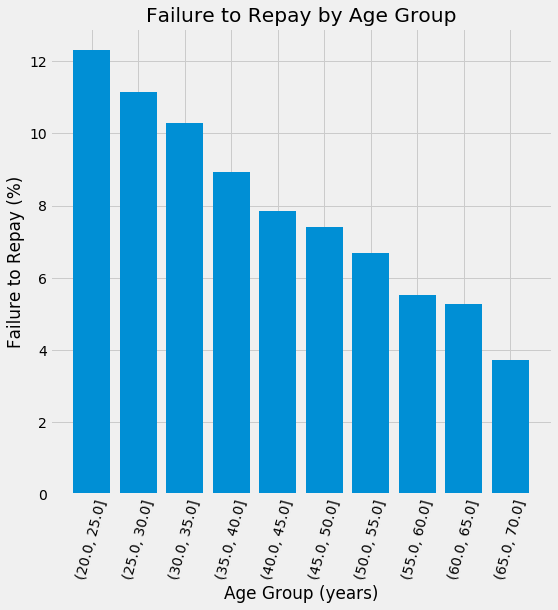

In [33]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### TABLEAU
will now do majority of work in TABLEAU to create initial graphs...